## Data
https://github.com/JcFreya/Adult-Census-Income

Data Information

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: final weight, continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Represents the responding unit’s role in the family. Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, 
Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Represents the responding unit’s role in the family. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: income from investment sources, apart from wages/salary, continuous.

capital-loss: losses from investment sources, apart from wages/salary, continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Výstup:

Construct a model that accurately predicts whether an individual makes more than $50,000.
What are the key factors contributing to high vs. low income?
Are there any significant gaps in these Census attributes by gender or race?
Any underneath clusters (group) based on census data?

In [1]:
import sys
print(sys.executable)

# s:\Git_Reps\STATNICE-SZZ-PB_SZZ-VB\PI\USU\venv\Scripts\python.exe -m pip install seaborn -. nainstalovat na interpretr, který se používá v souboru

s:\Git_Reps\STATNICE-SZZ-PB_SZZ-VB\PI\USU\venv\Scripts\python.exe


In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adults = pd.read_csv('adult.data', header=None, names=columns)

print(adults.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [4]:
# Kontrola nan hodnot
for i in adults.columns:
    print(f"Sloupec {i} | {adults[i].isna().sum()} z {adults.shape[0]}")

Sloupec age | 0 z 32561
Sloupec workclass | 0 z 32561
Sloupec fnlwgt | 0 z 32561
Sloupec education | 0 z 32561
Sloupec education-num | 0 z 32561
Sloupec marital-status | 0 z 32561
Sloupec occupation | 0 z 32561
Sloupec relationship | 0 z 32561
Sloupec race | 0 z 32561
Sloupec sex | 0 z 32561
Sloupec capital-gain | 0 z 32561
Sloupec capital-loss | 0 z 32561
Sloupec hours-per-week | 0 z 32561
Sloupec native-country | 0 z 32561
Sloupec income | 0 z 32561


In [5]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#ty dtype objecty - mohou obsahovat něco podivného
object_col = adults.select_dtypes(include=object).columns.tolist()
#print(object_col)

for c in object_col:
    print("Col: ", c)
    print(adults[c].unique())
    print("\n")

Col:  workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Col:  education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Col:  marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Col:  occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Col:  relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Col:  race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


Col:  sex
[' Male' ' Female']


Col:  

In [7]:
#poměr jednotlivých hodnot z pohledu oboru hodnot column
for c in object_col:
    print(adults[c].value_counts()/adults.shape[0],'\n')

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64 

education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64 

marital-status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: 

In [29]:
#v datech se nachází znak ? - je ho málo, takže jej vyhodim pomocí drop a filter
#adults = adults.replace(["?"], np.nan)
#adults = adults.dropna()

adults = adults.apply(lambda col: col.str.strip() if col.dtypes == "object" else col)

# nahradím "?" za NaN
adults = adults.replace("?", np.nan)

# drop NaN
adults = adults.dropna()

#for c in object_col:
#    print(adults[adults[c] == "?"])

print((adults == "?").sum().sum())   # počet zbývajících "?"


0


In [30]:
# Kouknu na outliery
print(adults.describe())

#zajímavé jsou sloupce capital-loss, capital-gain a fnlwgt - podívám se na ně později
#capital gain - má obrovskou směrodatnou odchylku - 75% hodnot jsou v rozsahu 0 
#capital loss - to samé
# zkontroluji importance těchto dimenzí a následně provedu standartizaci/škálování


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    30162.000000  
mean        40.931238  
std         11.979984  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


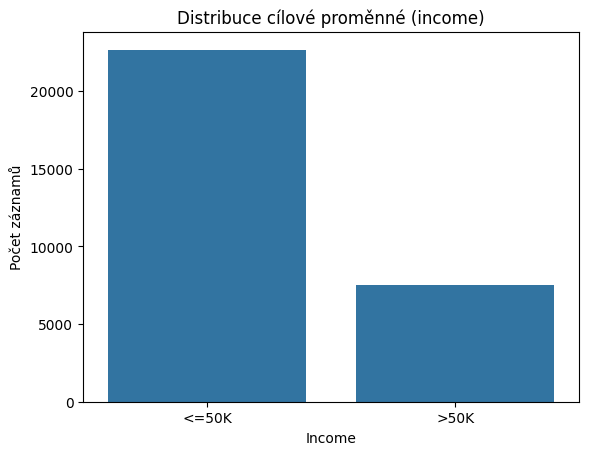

In [10]:
# Náhled na data
# je tu velká převaha jednotlivých kategorií - musím vyvážit následně sub datasety pro model
import seaborn as sns

sns.countplot(data=adults, x="income")
plt.title("Distribuce cílové proměnné (income)")
plt.xlabel("Income")
plt.ylabel("Počet záznamů")
plt.show()

C:\Users\Marty\AppData\Local\Temp\ipykernel_117856\3526186133.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
C:\Users\Marty\AppData\Local\Temp\ipykernel_117856\3526186133.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")


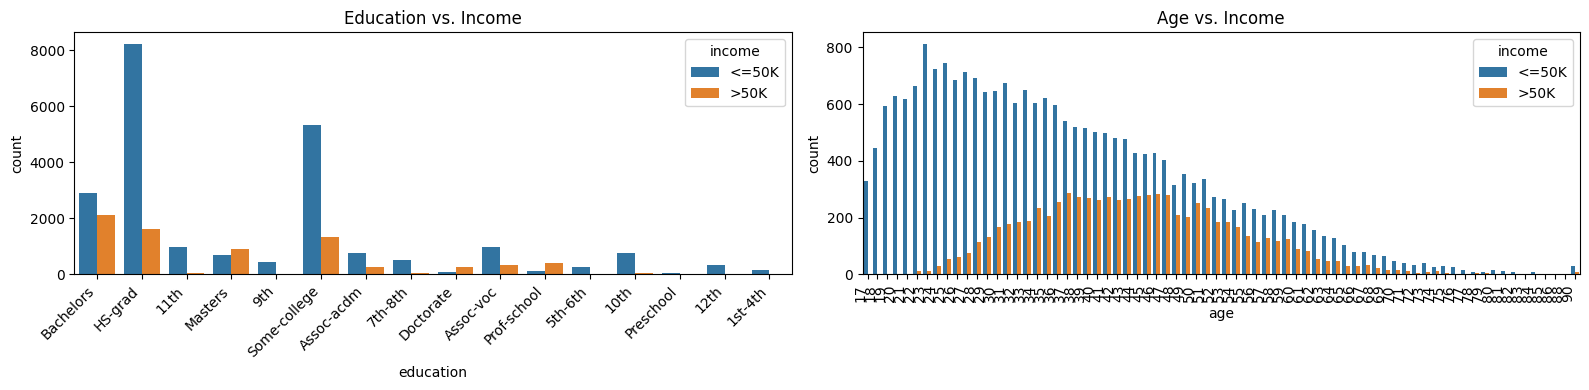

In [11]:

fig = plt.figure(figsize=(16,4))

# Education vs. Income
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(data=adults, x="education", hue="income", ax=ax1)
ax1.set_title("Education vs. Income")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Age vs. Income
ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(data=adults, x="age", hue="income", ax=ax2)
ax2.set_title("Age vs. Income")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

plt.show()

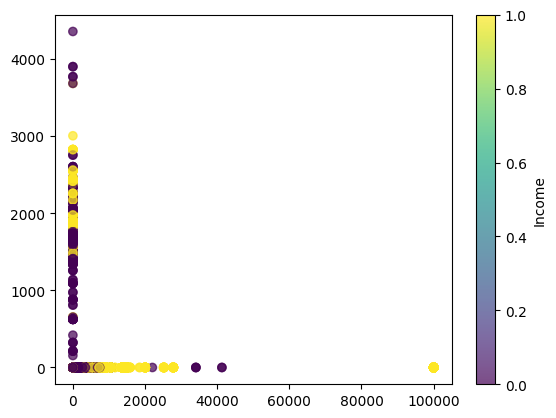

In [12]:
# scatter s cmap - barvama podle 3. proměnné - jenom abych veděl jak cca
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
income_numeric = le.fit_transform(adults["income"]) #převedu na num

plt.scatter(
    x=adults["capital-gain"],
    y=adults["capital-loss"],
    c=income_numeric,
    cmap="viridis",
    alpha=0.7
)
plt.colorbar(label="Income")
#plt.xlabel("Sex")
#plt.ylabel("Age")
#plt.title("Age vs Sex colored by Income")
plt.show()

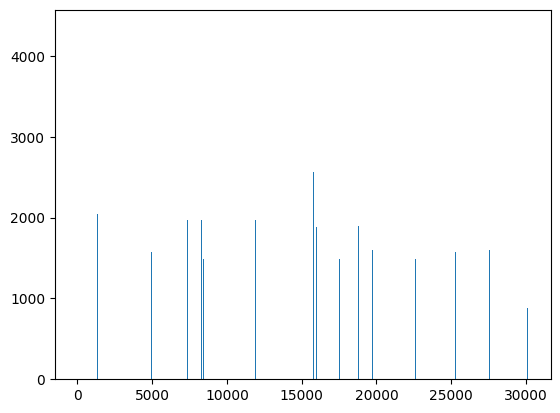

In [13]:
dummy_x = range(0,adults.shape[0])
plt.bar(dummy_x,adults["capital-loss"])
plt.show()

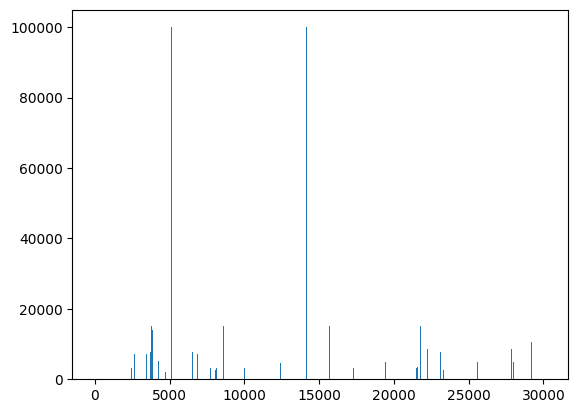

In [14]:
dummy_x = range(0,adults.shape[0])
plt.bar(dummy_x,adults["capital-gain"])
plt.show()

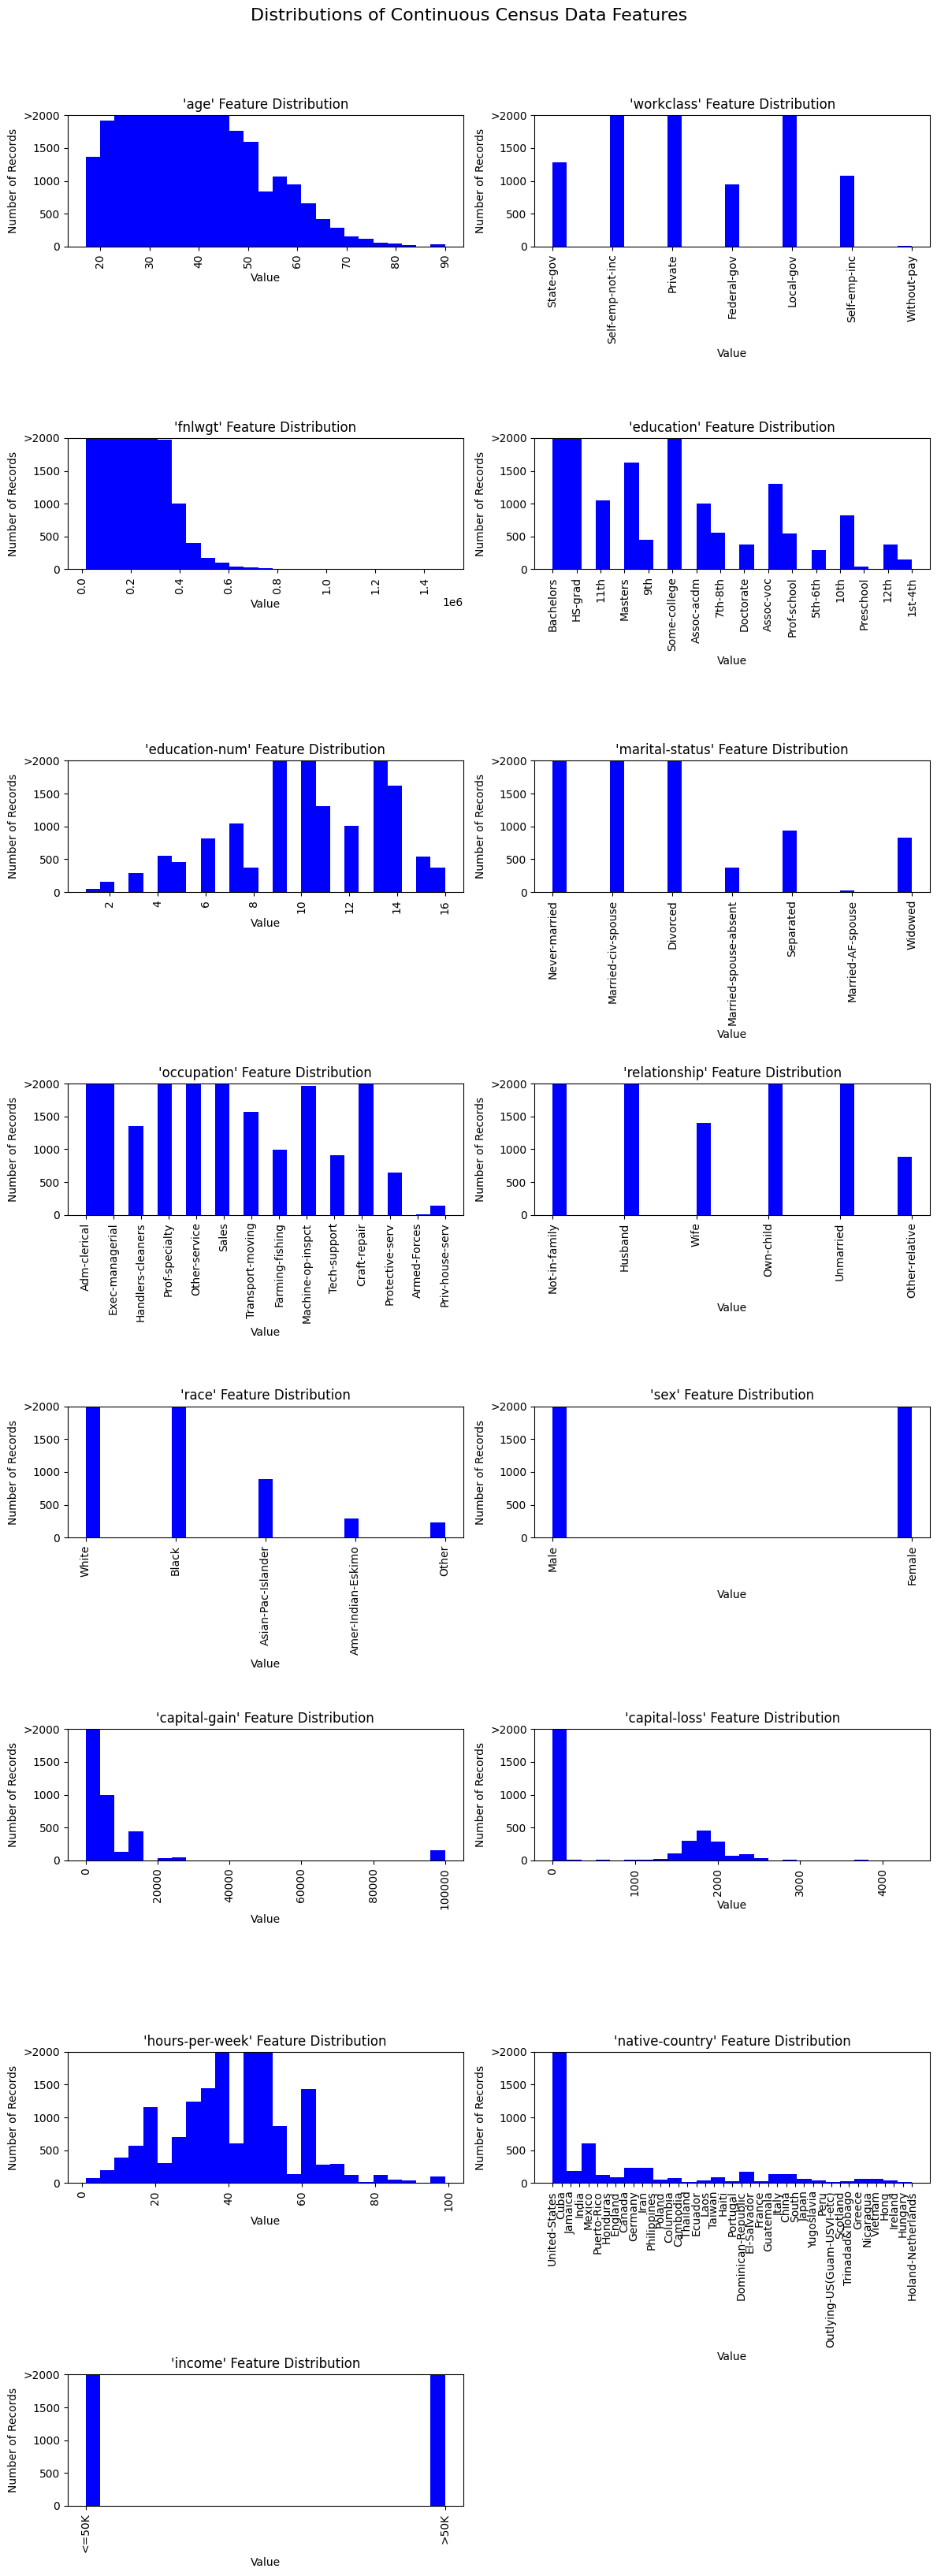

In [15]:
# zobrazení distribuce
import matplotlib.pyplot as plt
import math

n_cols = 2   # kolik grafů vedle sebe
n_rows = math.ceil(len(adults.columns) / n_cols) #nejblizší int

fig = plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(adults.columns):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.hist(adults[col], bins=25, color='blue')
    ax.set_title(f"'{col}' Feature Distribution", fontsize=12)
    ax.set_xlabel("Value")
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

fig.suptitle("Distributions of Continuous Census Data Features",
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [16]:
# Separace - X a Y cíl, - kombinace kodovani
X = adults.drop(columns='income')
print(adults['income'].unique())

y = adults['income'].str.strip().map({'<=50K': 0, '>50K': 1}).astype(int)

cols_obj = X.select_dtypes("object")
#print(cols_obj)

ohe = OneHotEncoder()

X = pd.get_dummies(X)

print(X)
print(y)

['<=50K' '>50K']
       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       wor

In [17]:
from sklearn.preprocessing import MinMaxScaler
# škálování - (0,1)

scaler = MinMaxScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

for c in num_cols:
    X[c] = scaler.fit_transform(X[[c]])  # [[c]]! aby zůstal 2D

print(X)

            age    fnlwgt  education-num  capital-gain  capital-loss  \
0      0.301370  0.043338       0.800000      0.021740           0.0   
1      0.452055  0.047277       0.800000      0.000000           0.0   
2      0.287671  0.137244       0.533333      0.000000           0.0   
3      0.493151  0.150212       0.400000      0.000000           0.0   
4      0.150685  0.220703       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.165563       0.733333      0.000000           0.0   
32557  0.315068  0.095589       0.533333      0.000000           0.0   
32558  0.561644  0.093914       0.533333      0.000000           0.0   
32559  0.068493  0.127620       0.533333      0.000000           0.0   
32560  0.479452  0.186383       0.533333      0.150242           0.0   

       hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0            0.397959                  False                False 

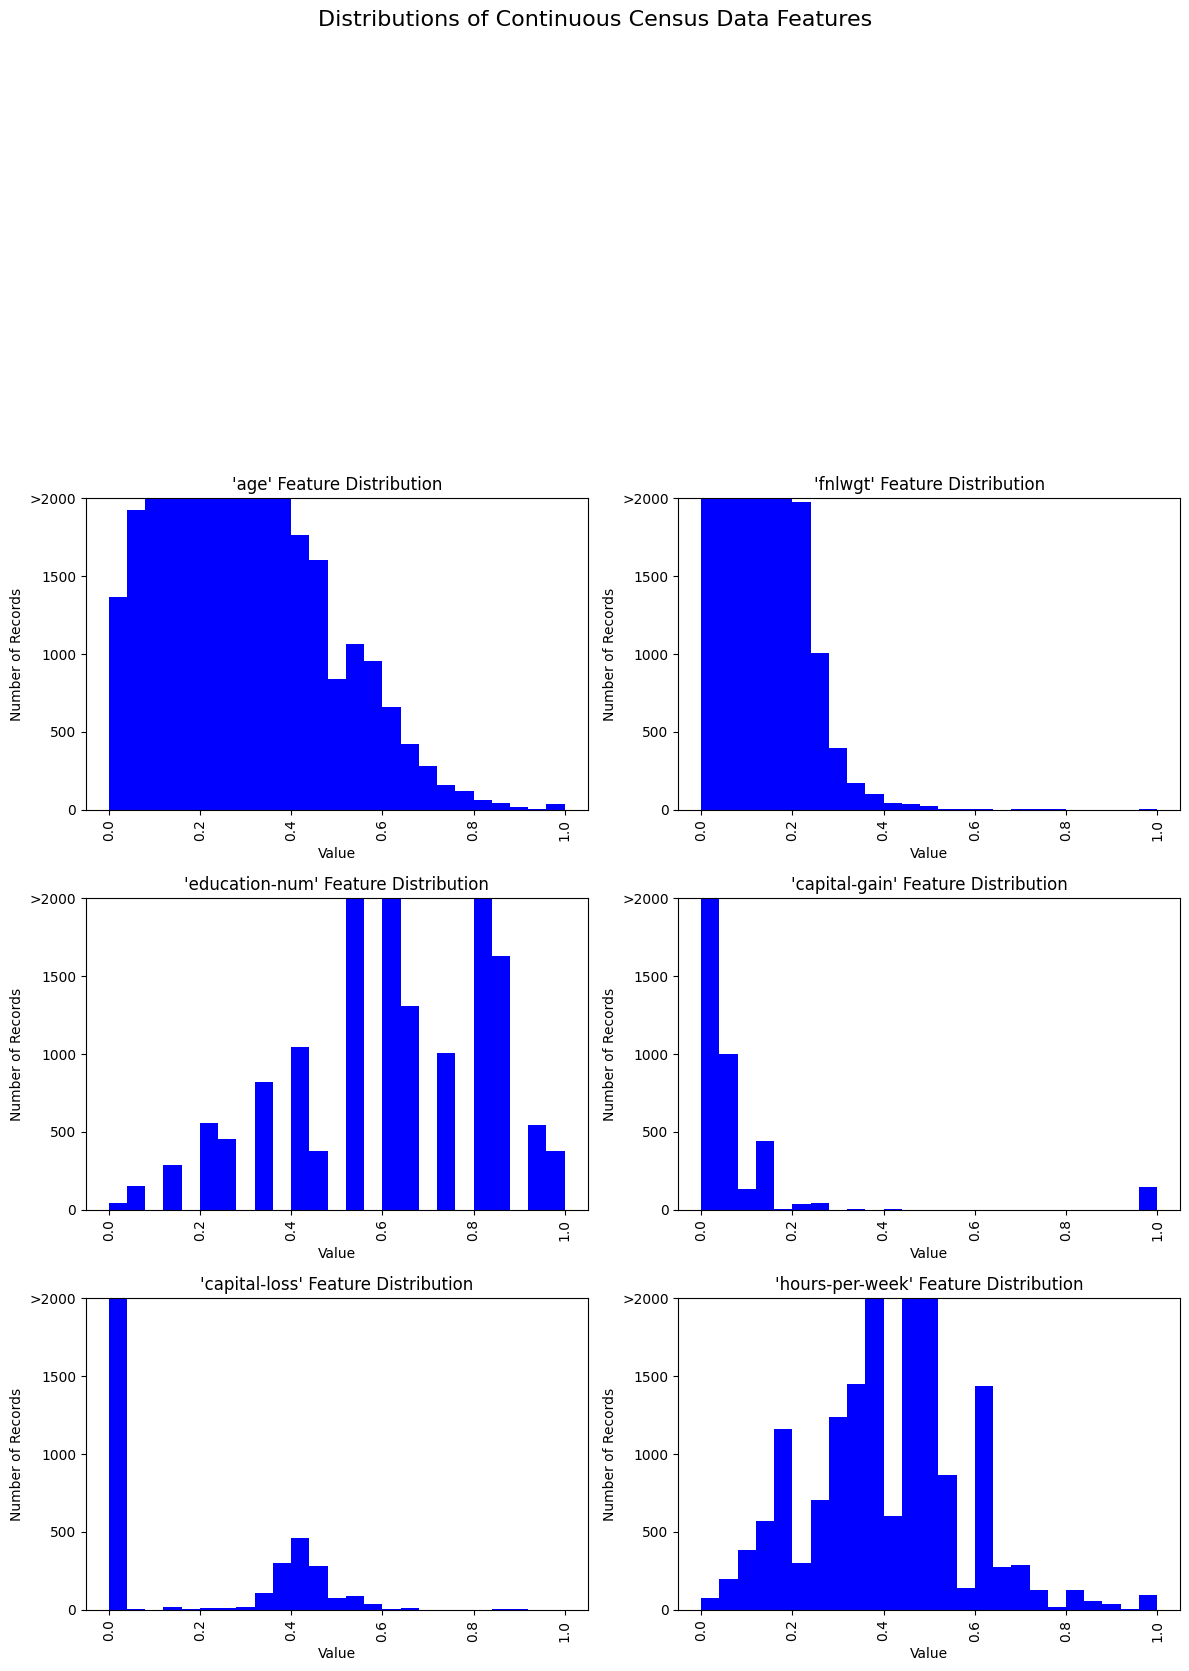

In [18]:
# zobrazení distribuce
import matplotlib.pyplot as plt
import math

n_cols = 2   # kolik grafů vedle sebe
n_rows = math.ceil(len(X.columns) / n_cols) #nejblizší int

fig = plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(X.select_dtypes(["int", "float"]).columns):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.hist(X[col], bins=25, color='blue')
    ax.set_title(f"'{col}' Feature Distribution", fontsize=12)
    ax.set_xlabel("Value")
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

fig.suptitle("Distributions of Continuous Census Data Features",
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

#Modely - data - jednotlivé sety
#print(X.head(10))
#print(40*"-")
#print(y.head(10))
#print(40*"-")
#print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y)

print(f"Train: 1  - {y_train.sum()} / {len(y_train)}")
print(f"Test:  1 - {y_test.sum()} / {len(y_test)}")



Train: 1  - 5665 / 22621
Test:  1 - 1843 / 7541


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Logistická regrese

lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train) #naučím
#lr.score(X_test,y_test)

y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred)) #matice záměn
print(classification_report(y_test, y_pred))


[[5259  439]
 [ 750 1093]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5698
           1       0.71      0.59      0.65      1843

    accuracy                           0.84      7541
   macro avg       0.79      0.76      0.77      7541
weighted avg       0.84      0.84      0.84      7541



In [21]:
#RFC
from sklearn.ensemble import RandomForestClassifier

rfc =  RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

y_pred = rfc.predict(X_test)



print(confusion_matrix(y_test, y_pred)) #matice záměn
print(classification_report(y_test, y_pred))

# dimensionalita
importances = rfc.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))


[[5234  464]
 [ 698 1145]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5698
           1       0.71      0.62      0.66      1843

    accuracy                           0.85      7541
   macro avg       0.80      0.77      0.78      7541
weighted avg       0.84      0.85      0.84      7541

                              Feature  Importance
1                              fnlwgt    0.159729
0                                 age    0.152396
3                        capital-gain    0.091438
5                      hours-per-week    0.083010
31  marital-status_Married-civ-spouse    0.068513
2                       education-num    0.061173
50               relationship_Husband    0.044251
4                        capital-loss    0.028203
33       marital-status_Never-married    0.019939
39         occupation_Exec-managerial    0.017104


In [22]:
#SVC
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred)) #matice záměn
print(classification_report(y_test, y_pred))

[[5245  453]
 [ 825 1018]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5698
           1       0.69      0.55      0.61      1843

    accuracy                           0.83      7541
   macro avg       0.78      0.74      0.75      7541
weighted avg       0.82      0.83      0.82      7541



In [23]:
# GridSearch - tuning hyperparametrů - pro RFC -> vrátí nejlepší parametry pro model podle scoringu
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

parameters = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 15, 20],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    rfc,
    param_grid=parameters,
    scoring="f1",      # nebo "roc_auc"
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
best_rfc = grid.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}
Best CV score: 0.7078612079004235


In [24]:

#MLP
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# škálování (předpoklad: X je numerické — po one-hot)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y.values, test_size=0.2, stratify=y, random_state=42
)

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")   # binární výstup
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    #metrics=[keras.metrics.AUC(name="auc"), "accuracy"]
    metrics=["accuracy"]
)

"""
es = keras.callbacks.EarlyStopping(
    monitor="val_auc", mode="max",
    patience=5, restore_best_weights=True
)
"""

hist = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    #callbacks=[es],
    verbose=0
)

y_proba = model.predict(X_test).ravel()
y_pred  = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4531
           1       0.70      0.66      0.68      1502

    accuracy                           0.84      6033
   macro avg       0.79      0.78      0.79      6033
weighted avg       0.84      0.84      0.84      6033

AUC: 0.901640452324143
Accuracy: 0.8445217967843527


In [25]:
print(feature_importance_df.head(10)) # z RFC - výstupy 10 top

top = feature_importance_df["Feature"][0:7]

print(feature_importance_df["Importance"][0:7].sum())


                              Feature  Importance
1                              fnlwgt    0.159729
0                                 age    0.152396
3                        capital-gain    0.091438
5                      hours-per-week    0.083010
31  marital-status_Married-civ-spouse    0.068513
2                       education-num    0.061173
50               relationship_Husband    0.044251
4                        capital-loss    0.028203
33       marital-status_Never-married    0.019939
39         occupation_Exec-managerial    0.017104
0.6605099727211955


In [26]:
# na nejlepším modelu zkusím redukované X
from sklearn.base import clone

#Vykreslení závislostí - redukce dimensionality
new_X = X[top]
#print(new_X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(new_X,y)

rfc_2 = clone(best_rfc).fit(X_train2,y_train2)

reduced_predictions = rfc_2.predict(X_test2)
print(classification_report(y_test2, reduced_predictions))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5642
           1       0.65      0.72      0.68      1899

    accuracy                           0.83      7541
   macro avg       0.78      0.79      0.78      7541
weighted avg       0.84      0.83      0.83      7541



[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]


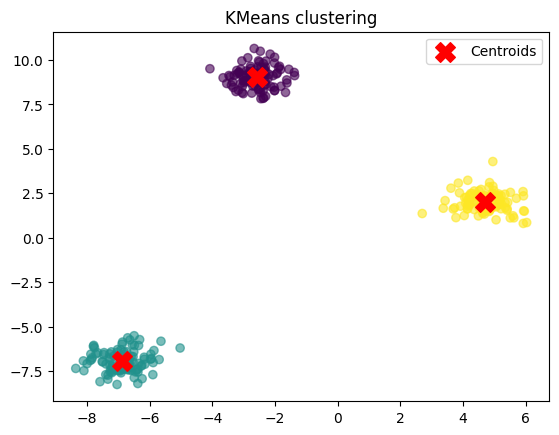

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2D data bez cíle
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

# vykreslení
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.legend()
plt.title("KMeans clustering")
plt.show()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



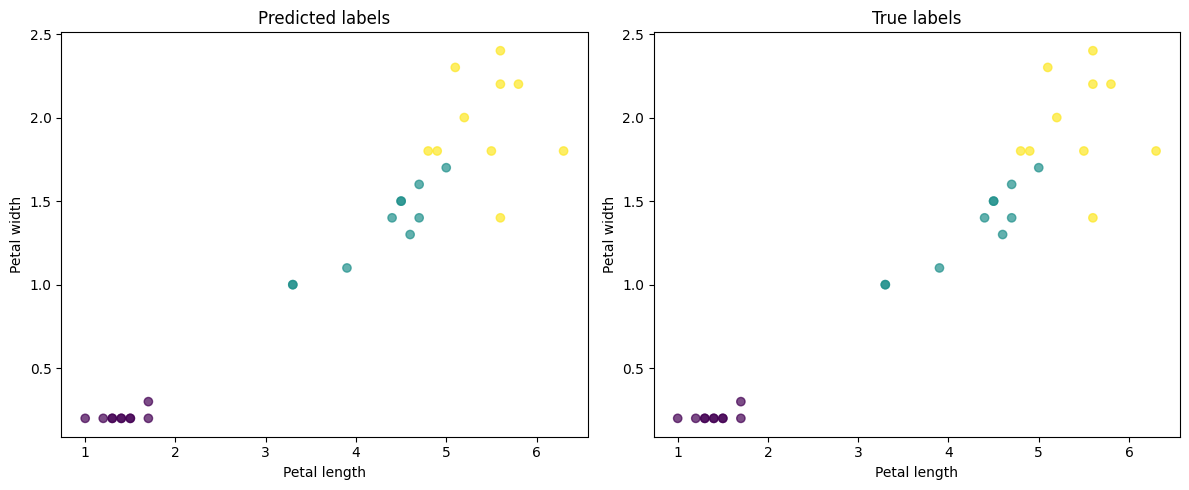

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42, stratify=iris.target
)

# kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predikce
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

plt.figure(figsize=(12,5))

# sredikce
plt.subplot(1,2,1)
plt.scatter(X_test[:,2], X_test[:,3], c=y_pred, cmap="viridis", alpha=0.7)
plt.xlabel("Petal length"); plt.ylabel("Petal width")
plt.title("Predicted labels")

# skutečné hodnoty
plt.subplot(1,2,2)
plt.scatter(X_test[:,2], X_test[:,3], c=y_test, cmap="viridis", alpha=0.7)
plt.xlabel("Petal length"); plt.ylabel("Petal width")
plt.title("True labels")

plt.tight_layout()
plt.show()